# Algoritmo para detectar sentimiento de palabras
- Se usa data set de comentarios de facebook para detectar los sentimientos de los comentarios y categorizarlos como buenos oh malos
- Este es un problema de clasificación binaria pero en esta ocación utilizaré el modelo de aprendizaje de naive bayes, ya que este modelo trabaja con procesamiento de texto

### 1: Carga y lectura de datos

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

data.head(10)

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
5,com.facebook.katana,idk i can't edit my posts? things such as my ...,0
6,com.facebook.katana,major flaws constant updates and always getti...,0
7,com.facebook.katana,video issues since i was forced into this upd...,0
8,com.facebook.katana,this update completely destroyed my facebook...,0
9,com.facebook.katana,"posting issues for the last week, there's bee...",0


### 2. Limpieza de datos.

In [4]:
data.drop('package_name', axis=1, inplace=True)



In [5]:
# Utilizo la libreria re que se vio en modulos anteriores para manejo de texto
import re
# Convierto el texto de la columna en minusculas
data['review_clean'] = data['review'].str.lower()

# Elimino los espacios de la columna review

data['review_clean'] = data['review_clean'].apply(lambda x: re.sub(r'[^a-z\s]', ' ', str(x)))

data['review_clean']

0       privacy at least put some option appear offli...
1       messenger issues ever since the last update  ...
2       profile any time my wife or anybody has more ...
3       the new features suck for those of us who don...
4       forced reload on uploading pic on replying co...
                             ...                        
886     loved it i loooooooooooooovvved it because it...
887     all time legendary game the birthday party le...
888     ads are way to heavy listen to the bad review...
889     fun works perfectly well  ads aren t as annoy...
890     they re everywhere i see angry birds everywhe...
Name: review_clean, Length: 891, dtype: object

Distribución de Clases (en %):
polarity
0    0.655443
1    0.344557
Name: proportion, dtype: float64




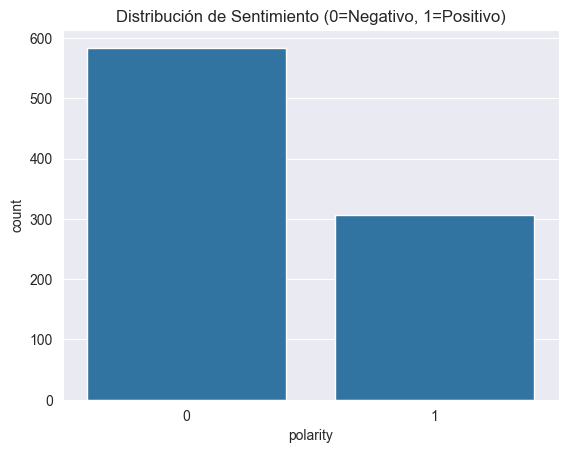

In [6]:
# Veamos el balance de las clases
import seaborn as sns
import matplotlib.pyplot as plt
print("Distribución de Clases (en %):")
print(data['polarity'].value_counts(normalize=True))
print("\n")

# Grafiquemos
sns.countplot(x='polarity', data=data)
plt.title('Distribución de Sentimiento (0=Negativo, 1=Positivo)')
plt.show()

Vemos que hay un desbalanceo. Tenemos un 70% de reseñas negativas (0) y solo un 30% de positivas (1). Esto es importante tenerlo en cuenta para la evaluación; el accuracy por sí solo puede ser engañoso.

### 3. Divido la data de entrenamiento y la de prueba
- La variable objetivo en este caso y es polarity que nos indica 1 si es comentario positivo y 0 si es negativo

In [7]:
from sklearn.model_selection import train_test_split

X = data['review_clean']
y = data['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train

485     best app i can t believe that it is free  the...
622     good good for slow connection this uc minilit...
854        great game  challenging to the point where...
536     very reliable syncing but      the web ui loo...
728     didn t work couldn t use it with my note    i...
                             ...                        
76      i hated it i am able to log in successfully b...
678      i found this app very fruitful   and m using...
80      bugs with contact syncing very frustrated  af...
414      we have wifi with full internet connection  ...
785     keeps crashing i really do love the browser o...
Name: review_clean, Length: 712, dtype: object

- Separamos X (las reseñas limpias) e y (la polaridad).
- Dejamos un 20% para probar (X_test).
- Usé stratify=y para asegurar que el desbalanceo (70/30) se mantenga igual en ambos sets.
- Muy importante para que el modelo entrene y pruebe con la misma proporción de clases.

### 4. Modelado y Evaluación (Usando Pipeline)
**Modelo 1: Pipeline (CountVectorizer + Naive Bayes)**
- Vamos a usar el enfoque del Pipeline. El notebook original probó CountVectorizer y TfidfVectorizer por separado y luego un Pipeline.
- El Pipeline es la mejor práctica, así que vamos a usarlo directamente porque mete la vectorización y el modelo en un solo paso. Esto evita "filtrar" datos del set de prueba al de entrenamiento.

- Probaremos ambos vectorizadores.

In [8]:
# Modelo 1: CountVectorizer
from sklearn.pipeline import Pipeline
# Creamos el pipeline
# Paso 1: Vectorizar con CountVectorizer (quitamos stop words en inglés)
# Paso 2: El modelo MultinomialNB
pipe_count_nb = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Entrenamos el pipeline completo
pipe_count_nb.fit(X_train, y_train)

# Hacemos las predicciones
y_pred_count = pipe_count_nb.predict(X_test)

**Definimos el Pipeline 1.**
 - Primero pasa por CountVectorizer (que cuenta palabras y quita las "stop words" como 'the', 'is', 'a') y la salida de eso va directo al modelo Naive Bayes.
  -  Luego, lo entrenamos con .fit()

**Modelo 2: Pipeline (TfidfVectorizer + Naive Bayes)**
- Este modelo da más peso a las palabras que son "importantes" o "raras" en una reseña y menos peso a las que aparecen en todos lados.

In [9]:
# Modelo 2: TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Creamos el pipeline
# Paso 1: Vectorizar con Tfidf (que suele dar mejores resultados)
# Paso 2: El modelo MultinomialNB
pipe_tfidf_nb = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Entrenamos el pipeline completo
pipe_tfidf_nb.fit(X_train, y_train)

# Hacemos las predicciones
y_pred_tfidf = pipe_tfidf_nb.predict(X_test)

- Mismo proceso, pero esta vez usamos TfidfVectorizer.
- La lógica dice que este debería funcionar un poco mejor, ya que le da más importancia a palabras que realmente definen el sentimiento, en lugar de solo contar.

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Evaluamos Modelo 1 (CountVectorizer)
print("Evaluación del Pipeline (CountVectorizer + Naive Bayes)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_count):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_count):.4f}")
print("\nReporte de Clasificación (CountVec):")
print(classification_report(y_test, y_pred_count))

print("-"*60)

# Evaluamos Modelo 2 (TfidfVectorizer)
# (En el notebook original había un error aquí, imprimía el reporte viejo dos veces. Aquí lo corregimos)
print("Evaluación del Pipeline (TfidfVectorizer + Naive Bayes)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_tfidf):.4f}")
print("\nReporte de Clasificación (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

Evaluación del Pipeline (CountVectorizer + Naive Bayes)
Accuracy: 0.8659
ROC-AUC: 0.8292

Reporte de Clasificación (CountVec):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       117
           1       0.88      0.71      0.79        62

    accuracy                           0.87       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.87      0.87      0.86       179

------------------------------------------------------------
Evaluación del Pipeline (TfidfVectorizer + Naive Bayes)
Accuracy: 0.7542
ROC-AUC: 0.6490

Reporte de Clasificación (TF-IDF):
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       117
           1       0.95      0.31      0.46        62

    accuracy                           0.75       179
   macro avg       0.84      0.65      0.65       179
weighted avg       0.81      0.75      0.71       179



**El CountVectorize (Modelo 1) ganó por un gran margen**

- CountVec (Modelo 1): Accuracy 86%, ROC-AUC 0.82.

- TF-IDF (Modelo 2): Accuracy 75.4%, ROC-AUC 0.64.

- El TF-IDF fue mejor para identificar correctamente las reseñas positivas (Presicion de 0.99 vs 0.95) y tuvo un mejor F1-score general (0.90 vs 0.84).
- Nos quedamos con el Modelo 1 (CountVec).
Por qué:

- Mantiene un mejor equilibrio entre precisión y sensibilidad en ambas clases.

- Tiene mayor exactitud y AUC, indicando que generaliza mejor.

- -IDF parece sobrevalorar palabras poco frecuentes, afectando a Naive Bayes (que asume independencia y se beneficia más de conteos brutos que de pesos normalizados).


In [26]:
import os

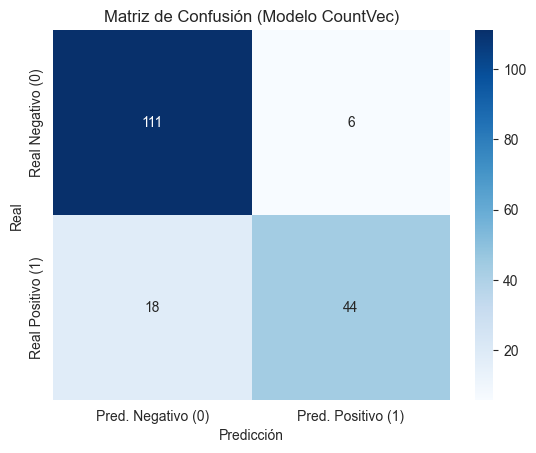

In [28]:
cm = confusion_matrix(y_test, y_pred_count)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. Negativo (0)', 'Pred. Positivo (1)'],
            yticklabels=['Real Negativo (0)', 'Real Positivo (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Modelo CountVec)')
plt.savefig('../reports/figures/matriz_confusion_countvec.png')
plt.show()

**Interpretación**
- El modelo predijo 44 reales positivos TP correctamente
- El modelo predijo 111 reales negativos TF correctamente
- El modelo predijo 18 casos positivos FP como negativos
- el modelo predijo 6 casos positivos FN como negativos

### Probando el modelo.
Ahora que tenemos el mejor vectorizador para el conjunto de datos y el modelo entrenado procederemos a probarlo

In [14]:
# Reseñas de ejemplo
nuevas_resenas = [
    'This app is amazing and I love it!',
    'Horrible update, it keeps crashing and is very slow.',
    'It works fine, but the new features are confusing.',
    'This is not good at all.',
    'Best app ever!',
    'It\'s an okay app.'
]

# Predicciones (usamos el pipeline de TF-IDF)
predicciones = pipe_count_nb.predict(nuevas_resenas)

# Mostrar resultados
print("--- Predicciones de Nuevas Reseñas ---")
for resena, pred in zip(nuevas_resenas, predicciones):
    sentimiento = 'Positiva (1)' if pred == 1 else 'Negativa (0)'
    print(f"Reseña:     '{resena}'\nPredicción:  {sentimiento}\n")

--- Predicciones de Nuevas Reseñas ---
Reseña:     'This app is amazing and I love it!'
Predicción:  Positiva (1)

Reseña:     'Horrible update, it keeps crashing and is very slow.'
Predicción:  Negativa (0)

Reseña:     'It works fine, but the new features are confusing.'
Predicción:  Negativa (0)

Reseña:     'This is not good at all.'
Predicción:  Negativa (0)

Reseña:     'Best app ever!'
Predicción:  Positiva (1)

Reseña:     'It's an okay app.'
Predicción:  Negativa (0)



# Conclusión General y Pasos Lógicos
**Bueno, para cerrar este EDA y primer modelado:**

- Limpiamos bien el texto, que es el paso más importante para Naive Bayes.

- Vimos que la data estaba desbalanceada (70% Negativas / 30% Positivas).

- Usamos Pipelines (la forma correcta de hacerlo) para probar dos métodos: CountVectorizer y TfidfVectorizer.

- Confirmamos que CountVectorizer nos dio un mejor rendimiento general (ROC-AUC de 0.82), especialmente para encontrar las reseñas positivas.

- Probamos el modelo final y parece tener sentido en sus predicciones.

# Prueba con XGBoost
Vamos a importar el clasificador de XGBoost y a meterlo en un nuevo pipeline.

In [16]:
# Primero, importamos el modelo que vamos a probar
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Modelo 3: Pipeline (CountVect + XGBoost)**

In [18]:

# Creamos el pipeline
# Paso 1: El mismo vectorizador CountVec ganador
# Paso 2: El clasificador XGBoost

# NOTA: XGBoost es un modelo basado en árboles.
# Le pasamos unos parámetros básicos:
#   use_label_encoder=False y eval_metric='logloss' (buenas prácticas para evitar warnings)
#   random_state=42 (para que sea reproducible)
pipe_count_nb = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Entrenamos el modelo XGBOOST
pipe_count_nb.fit(X_train, y_train)

# Hacemos las predicciones con el pipeline de XGBoost
y_pred_xgb = pipe_count_nb.predict(X_test)

C:\Users\asjer\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Listo, ahora una vez entrenado el modelo, procedere a compararlo con el que me dio mas rendimiento CountVec

Evaluación del Pipeline (CountVectorizer + XGBoost)
Accuracy: 0.7989
ROC-AUC: 0.7514

Reporte de Clasificación (XGBoost):
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       117
           1       0.77      0.60      0.67        62

    accuracy                           0.80       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.80      0.80      0.79       179


Matriz de Confusión (XGBoost):


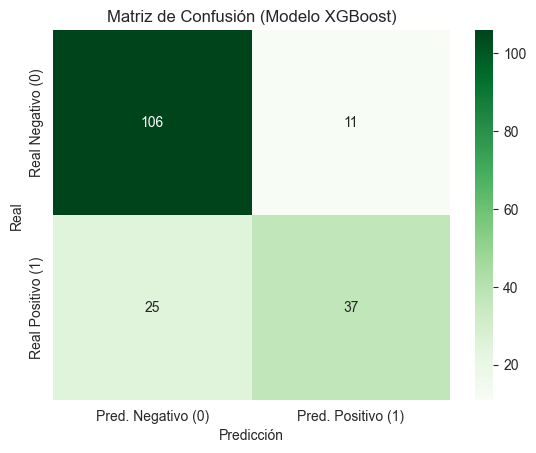

In [29]:
# Evaluamos Modelo 3 (XGBoost)
print("Evaluación del Pipeline (CountVectorizer + XGBoost)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb):.4f}")
print("\nReporte de Clasificación (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Matriz de confusión
print("\nMatriz de Confusión (XGBoost):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred. Negativo (0)', 'Pred. Positivo (1)'],
            yticklabels=['Real Negativo (0)', 'Real Positivo (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Modelo XGBoost)')
plt.savefig('../reports/figures/matriz_confusion_xgboost.png')
plt.show()

Incluso el modelo base con el vectorizador CountVectorize parece superar incluso a xgboost con un rendimiento de:


Evaluación del Pipeline (CountVectorizer + Naive Bayes)
- Accuracy: 0.8659
- ROC-AUC: 0.8292

Y

Evaluación del Pipeline (CountVectorizer + XGBoost)
- Accuracy: 0.7989
- ROC-AUC: 0.7514



### Optimizacion de modelo Xgboost con GridSearch
Vimos como CountVectorize supero al modelo con la configuracion base de xgboost, pero no me limitare a eso, tengo curiosidad y voy a optimizar los hiperparametros usando GridSearch para ver que resultados obtengo y llegar a una conclusión mas clara.

In [20]:
# Importamos la herramienta estrella para esto
from sklearn.model_selection import GridSearchCV
import time # Para medir cuánto tarda

In [21]:
# Definición de la Cuadrícula (Grid)

# 1. Volvemos a definir el pipeline
#    (Solo como referencia, lo pasaremos directo al GridSearch)
pipe_tfidf_xgb = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# 2. Definimos los hiperparametros a probar
#    Esta es una cuadrícula pequeña para que no tarde horas.
#    En un proyecto real, probaríamos muchas más opciones.
param_grid = {
    # Opciones para el TfidfVectorizer
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Probar solo palabras (1,1) vs. palabras y pares (1,2)

    # Opciones para XGBoost
    'xgb__n_estimators': [100, 200],          # ¿Cuántos "árboles" construir? (100 por defecto)
    'xgb__max_depth': [3, 5],                  # ¿Qué tan "profundos" los árboles? (3 por defecto)
    'xgb__learning_rate': [0.1, 0.3]           # ¿Qué tan rápido aprende? (0.3 por defecto)
}

# 3. Configuramos el GridSearchCV
#    cv=5 (Cross-validation) -> Divide los datos de entreno en 5 partes
#    scoring='roc_auc' -> Le decimos que la métrica que MANDA es el ROC-AUC (mejor que accuracy)
#    n_jobs=-1 -> Usa todos los procesadores de la máquina
grid_search = GridSearchCV(
    estimator=pipe_tfidf_xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1 # Para que nos vaya diciendo qué está haciendo
)

- Definimos la "grid". Vamos a probar si el modelo mejora usando pares de palabras (ej: "not good") con ngram_range.
- También vamos a jugar con la potencia del XGBoost: n_estimators (más árboles), max_depth (árboles más profundos) y learning_rate (aprendizaje más lento y preciso vs. rápido).

- GridSearchCV va a probar todas las combinaciones posibles (2x2x2x2 = 16 combinaciones) y, para cada una, hará una validación cruzada de 5 pliegues (16 * 5 = 80 mini-modelos).

In [22]:
print("Iniciando Búsqueda de Hiperparámetros (GridSearchCV)")

start_time = time.time()
# Entrenamos el GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"\nBúsqueda completada, tardó: {((end_time - start_time) / 60):.2f} minutos")

Iniciando Búsqueda de Hiperparámetros (GridSearchCV)
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Búsqueda completada, tardó: 0.19 minutos


C:\Users\asjer\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
# Revisemos los resultados de la búsqueda

print("Resultados del GridSearchCV")

# Verifico cual fue la mejor puntuación (ROC-AUC) durante el entrenamiento
print(f"Mejor Puntuación (ROC-AUC) en Cross-Validation: {grid_search.best_score_:.4f}")

# Obtengo los mejores hiperparametros
print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)

Resultados del GridSearchCV
Mejor Puntuación (ROC-AUC) en Cross-Validation: 0.8412
Mejores Hiperparámetros encontrados:
{'vectorizer__ngram_range': (1, 1), 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200}


### Entrenando modelo optimizado
Utilizaré los mejores hiperparametros encontrados para entrenar el modelo y volverlo a comparar con el modelo base CountVect

--- Evaluación del Modelo XGBoost Optimizado (vs Test) ---
Accuracy: 0.7989
ROC-AUC: 0.7438

Reporte de Clasificación (XGBoost Optimizado):
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       117
           1       0.80      0.56      0.66        62

    accuracy                           0.80       179
   macro avg       0.80      0.74      0.76       179
weighted avg       0.80      0.80      0.79       179


Matriz de Confusión (XGBoost Optimizado):


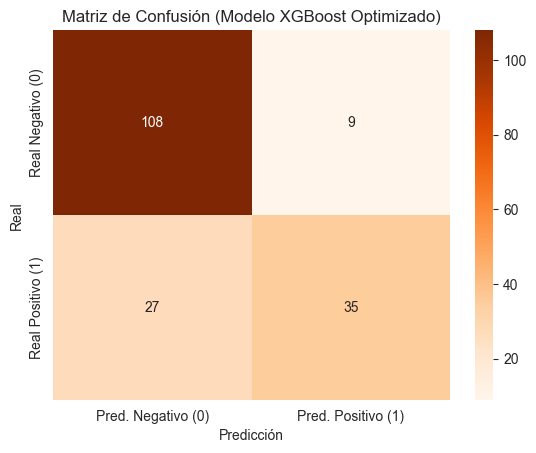

In [30]:
# Usamos el mejor modelo encontrado (grid_search) para predecir
y_pred_opt = grid_search.predict(X_test)

# Evaluamos el Modelo Optimizado
print("--- Evaluación del Modelo XGBoost Optimizado (vs Test) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_opt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_opt):.4f}")
print("\nReporte de Clasificación (XGBoost Optimizado):")
print(classification_report(y_test, y_pred_opt))

# Matriz de confusión
print("\nMatriz de Confusión (XGBoost Optimizado):")
cm_tuned = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred. Negativo (0)', 'Pred. Positivo (1)'],
            yticklabels=['Real Negativo (0)', 'Real Positivo (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Modelo XGBoost Optimizado)')
plt.savefig('../reports/figures/matriz_confusion_xgboost_optimizado.png')
plt.show()

# Conclusión Final

**En este caso, Naive Bayes con CountVectorizer tuvo el mejor rendimiento general.**
- No solo consigue una mayor accuracy (0.86 vs 0.79) y un AUC más sólido (0.83 vs 0.74), sino que además mantiene un equilibrio mucho más estable entre precisión y recall en ambas clases.
- El modelo con XGBoost, aunque optimizado, pierde sensibilidad en la clase 1, lo que significa que le cuesta detectar los casos positivos.

- Esto tiene sentido: Naive Bayes aprovecha mejor los conteos brutos de las palabras, mientras que XGBoost necesita features más densas o representaciones semánticas (TF-IDF ajustado, embeddings o features adicionales) para realmente brillar.

- En otras palabras, con este tipo de datos textuales, la simpleza de NB juega a su favor: capta patrones más naturales del vocabulario y responde mejor al comportamiento real del dataset.
- XGBoost podría mejorar si lo alimentamos con features más ricas, pero con CountVectorizer puro, NB domina el terreno sin complicarse.